In [1]:
# dependencies for google colab
! pip install langchain_google_genai
! pip install python-dotenv
! pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [2]:
import requests
from PIL import Image
import torch
#importing models
from transformers import BlipProcessor, BlipForConditionalGeneration
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv
import os
import re

from langchain import PromptTemplate
from langchain.chains import LLMChain
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import ChatPromptTemplate
import gradio as gr

from diffusers import DiffusionPipeline


In [3]:
load_dotenv()


True

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
Hugging_face_token=os.getenv('hugging_face_token')

In [6]:
! huggingface-cli login --token $Hugging_face_token


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
The token `zephyrus` has been saved to /root/.cache/huggingface/stored_tokens
Your token has been saved to /root/.cache/huggingface/token
Login successful.
The current active token is: `zephyrus`


In [7]:

# from transformers import Blip2Processor, Blip2ForConditionalGeneration
# import torch

# device = "cuda" if torch.cuda.is_available() else "cpu"

# processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
# model = Blip2ForConditionalGeneration.from_pretrained(
#     "Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16
# )
# model.to(device)
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

# inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

# generated_ids = model.generate(**inputs)
# generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
# print(generated_text)

In [8]:
# loading image captionning model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device, torch.float16)


# loading stable diffusion
pipe = DiffusionPipeline.from_pretrained("stable-diffusion-v1-5/stable-diffusion-v1-5")
pipe = pipe.to(device, torch.float16)




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [9]:
# # loading stable diffusion
# pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-3.5-medium")
# pipe = pipe.to(device, torch.float16)


In [10]:
img_url = '/content/drawing_by_charlotte_8655421883-1.jpg'
raw_image = Image.open(img_url)

In [11]:
# # conditional image captioning
# text = "a photography of"
# inputs = processor(raw_image, text, return_tensors="pt").to("cuda")

# out = model.generate(**inputs).
# print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt").to(device, torch.float16)

out = model.generate(**inputs, min_length=20)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


drawing of an elephant with a sign saying save me and a sun in the background with a sign


In [12]:
model_prompt=processor.decode(out[0], skip_special_tokens=True)

In [13]:
model_prompt

'drawing of an elephant with a sign saying save me and a sun in the background with a sign'

In [14]:


# Set the model name for our LLMs.
GEMINI_MODEL = "gemini-1.5-flash"

# Store the API key in a variable.
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

In [15]:
llm = ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

In [16]:
requirement = input("Please input your requirement for the story: ")

Please input your requirement for the story: exciting, for an eight year old child


In [20]:
query =f' Write a 4 chapters story based on {model_prompt} and\
  that fits the following requirements: {requirement}. Give a detailed\
  description of the charaters appearences.'

In [21]:
result = llm.invoke(query)
print(result.content)

## The Elephant's Sunbeam Rescue

**Chapter 1: The Whispering Sun**

Sunny was a small, but incredibly bright sun.  He wasn't a real sun, of course, but a magical one painted on a giant canvas in the sky above the Whispering Woods.  He had a cheerful, smiling face made of golden rays, and wore a tiny, shimmering cloud as a hat.  Around his neck hung a sign that read, in sparkly letters: "HELP NEEDED!"

Below Sunny, in a clearing surrounded by towering, whispering trees with leaves like emerald velvet, stood Ekon the elephant. Ekon was a magnificent creature, his skin the colour of warm sand, his ears like giant, flapping fans, and his tusks long and curved like polished ivory scimitars.  He had kind, brown eyes, but they were filled with worry.  Around his neck hung a smaller sign, painted in wobbly, tear-stained letters: "SAVE ME!"

Ekon was trapped!  A mischievous group of giggling pixies, with their tiny wings shimmering like rainbow dust and their hair like spun moonlight, had tang

In [22]:
story= result.content.replace('\n',' ')
story

'## The Elephant\'s Sunbeam Rescue  **Chapter 1: The Whispering Sun**  Sunny was a small, but incredibly bright sun.  He wasn\'t a real sun, of course, but a magical one painted on a giant canvas in the sky above the Whispering Woods.  He had a cheerful, smiling face made of golden rays, and wore a tiny, shimmering cloud as a hat.  Around his neck hung a sign that read, in sparkly letters: "HELP NEEDED!"  Below Sunny, in a clearing surrounded by towering, whispering trees with leaves like emerald velvet, stood Ekon the elephant. Ekon was a magnificent creature, his skin the colour of warm sand, his ears like giant, flapping fans, and his tusks long and curved like polished ivory scimitars.  He had kind, brown eyes, but they were filled with worry.  Around his neck hung a smaller sign, painted in wobbly, tear-stained letters: "SAVE ME!"  Ekon was trapped!  A mischievous group of giggling pixies, with their tiny wings shimmering like rainbow dust and their hair like spun moonlight, had t

In [ ]:
# character_extraction_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)
# schemas=[
#     ResponseSchema(name='character 1', description='character description'),
#     ResponseSchema(name='character 2', description='character description'),
#     ResponseSchema(name='character 3', description='character description')

# ]
# character_parser=StructuredOutputParser.from_response_schemas(schemas)
# instructions=character_parser.get_format_instructions()

In [ ]:
# query = f' list the appearance of 3 characters of this {story}'+ '\n\n'+instructions

In [ ]:
# result_characters=character_extraction_llm.invoke(query)

In [ ]:
# result_characters.content

In [ ]:
# characters=character_parser.parse(result_characters.content)
# characters

In [23]:
image_prompt_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

schemas=[
    ResponseSchema(name='prompt 1', description='the prompt'),
    ResponseSchema(name='prompt 2', description='the prompt'),
    ResponseSchema(name='prompt 3', description='the prompt'),
    ResponseSchema(name='prompt 4', description='the prompt')
]

parser=StructuredOutputParser.from_response_schemas(schemas)
instructions=parser.get_format_instructions()

In [79]:
query = f' Based on this story: {story}. Create 4 prompts for stable diffusion that tells\
  what happens in each chapters. Describe the characters everytime their name is mentioned. Each image should have the same style.\
  '+ '\n\n'+instructions




In [80]:
result=image_prompt_llm.invoke(query)
result

AIMessage(content='```json\n{\n  "prompt 1": "A whimsical, storybook illustration of a giant canvas painted in the sky depicting Sunny, a cheerful magical sun with a smiling face made of golden rays, wearing a tiny cloud hat and a sign saying \\"HELP NEEDED!\\". Below, in a clearing of emerald velvet trees, stands Ekon, a magnificent elephant with warm sand-colored skin, giant flapping ears, and long curved tusks, trapped in a thick, shimmering spider silk web. His smaller sign reads \\"SAVE ME!\\" in wobbly, tear-stained letters.  Style:  Charming, detailed, reminiscent of classic children\'s book illustrations.",\n  "prompt 2": "Two adventurous squirrels, Pip, a larger squirrel with bright orange fur and an acorn-shell helmet, and Squeak, a smaller, faster squirrel with grey fur and bright black eyes, zip through the air towards Ekon, the magnificent elephant trapped in the spider silk. Pip uses his teeth to gnaw at the silk while Squeak, using miniature silver shears, cuts the web. 

In [81]:
image_prompts = parser.parse(result.content)

In [82]:
image_prompts

{'prompt 1': 'A whimsical, storybook illustration of a giant canvas painted in the sky depicting Sunny, a cheerful magical sun with a smiling face made of golden rays, wearing a tiny cloud hat and a sign saying "HELP NEEDED!". Below, in a clearing of emerald velvet trees, stands Ekon, a magnificent elephant with warm sand-colored skin, giant flapping ears, and long curved tusks, trapped in a thick, shimmering spider silk web. His smaller sign reads "SAVE ME!" in wobbly, tear-stained letters.  Style:  Charming, detailed, reminiscent of classic children\'s book illustrations.',
 'prompt 2': "Two adventurous squirrels, Pip, a larger squirrel with bright orange fur and an acorn-shell helmet, and Squeak, a smaller, faster squirrel with grey fur and bright black eyes, zip through the air towards Ekon, the magnificent elephant trapped in the spider silk. Pip uses his teeth to gnaw at the silk while Squeak, using miniature silver shears, cuts the web. The scene is set in the Whispering Woods, 

In [83]:
# prompt = result["text"]
images=[]
for i in image_prompts.keys():

  image = pipe(image_prompts[i]).images[0]
  images.append(image)

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['curved tusks , trapped in a thick , shimmering spider silk web . his smaller sign reads " save me !" in wobbly , tear - stained letters . style : charming , detailed , reminiscent of classic children \'s book illustrations .']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["the web . the scene is set in the whispering woods , with towering trees and the magical sun , sunny , shining brightly overhead . style : charming , detailed , reminiscent of classic children 's book illustrations ."]


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["and filled with shimmering spider silk and rainbow pixie dust . sunny , the magical sun , is visible in the background . style : charming , detailed , reminiscent of classic children 's book illustrations ."]


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sign is replaced with " mission accomplished !". ekon , pip , and squeak enjoy a berry picnic under sunny \'s watchful gaze . style : charming , detailed , reminiscent of classic children \'s book illustrations .']


  0%|          | 0/50 [00:00<?, ?it/s]

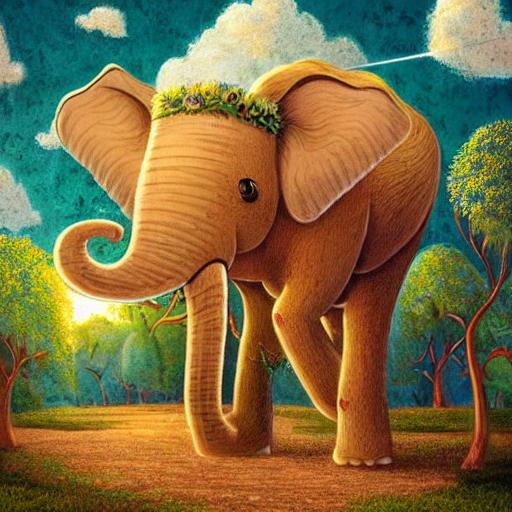

In [84]:
images[0]

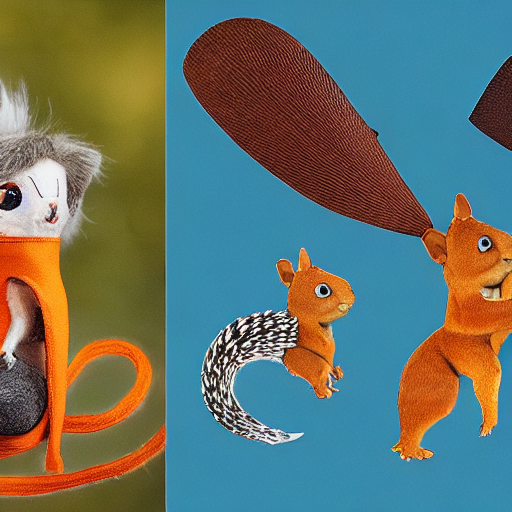

In [85]:
images[1]

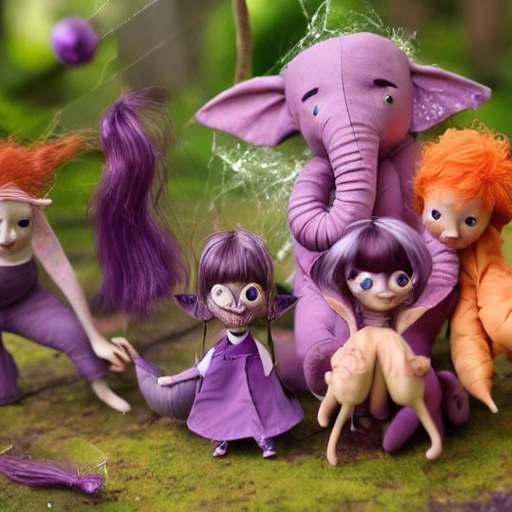

In [86]:
images[2]

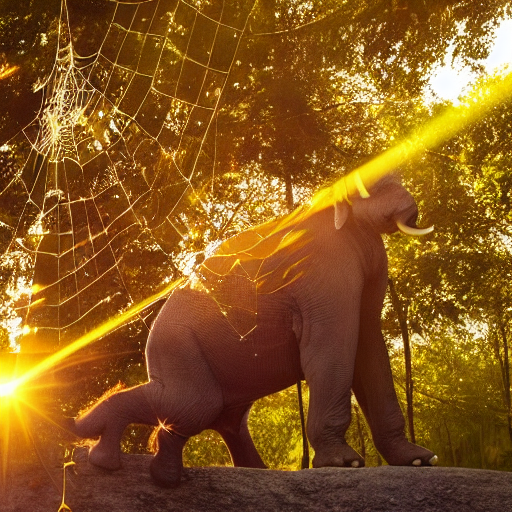

In [87]:
images[3]

In [ ]:
# def image_story_generator(image,requirement):

#   raw_image = Image.open(image)

#   # get caption from image
#   inputs = processor(raw_image, return_tensors="pt").to(device, torch.float16)
#   out = model.generate(**inputs, min_length=20)
#   model_prompt=processor.decode(out[0], skip_special_tokens=True)

#   #load gemnini for creating story
#   llm = ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

#   query =f' Write a short story based on the content of {model_prompt} and \
#   that fits the following requirements: {requirement}. give a detailed \
#   description of the charaters appearences '

#   result = llm.invoke(query)
#   story= result.content.replace('\n',' ')

#   # create promts for image gen from story
#   image_prompt_llm=ChatGoogleGenerativeAI(google_api_key=GEMINI_API_KEY, model=GEMINI_MODEL, temperature=0.3)

#   # create shemas to format output
#   schemas=[
#       ResponseSchema(name='prompt 1', description='the prompt'),
#       ResponseSchema(name='prompt 2', description='the prompt'),
#       ResponseSchema(name='prompt 3', description='the prompt'),
#       ResponseSchema(name='prompt 4', description='the prompt')
#   ]

#   # initialize parer ofr output
#   parser=StructuredOutputParser.from_response_schemas(schemas)
#   instructions=parser.get_format_instructions()

#   query = f' based on this story: {story}. Create 4 prompts for stable diffusion that tells\
# the story in a linear fashion with a consistant drawing style. Make sure to describe the characters everytime\
#   The prompts have to be a minimum of 70 and a maximum of 77 tokens long each'+ '\n\n'+instructions

#   result=image_prompt_llm.invoke(query)
#   image_prompts = parser.parse(result.content)

#   # iterate through the prompts and generate new images
#   images=[]
#   for i in image_prompts.keys():

#     image = pipe(image_prompts[i]).images[0]
#     images.append(image)



#   return images, story




In [ ]:
# images,story=image_story_generator(img_url,requirement)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["details like the jellyfish 's translucent bodies and finley 's curious expression ."]


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['first image , maintaining a whimsical , painterly feel , emphasizing the playful interaction between finley and the other sea creatures .']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["on the action and finley 's determined expression ."]


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["showcasing finley 's contentment and the peaceful underwater environment . focus on the joy in finley 's expression ."]


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# # gradio
# interface = gr.Interface(
#     fn=image_story_generator,
#     inputs=[gr.Image(type='filepath'),gr.Textbox('input requirements')],

#     outputs=[gr.Gallery('images'),
#         gr.Textbox('story')
#     ],
#     description='Upload an image to start the story generation process.'
# )

# interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://682191becb6be55721.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
